In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb

# Loading Data

In [2]:
df = pd.read_csv("../datasets/Thesis_dataset.csv",header=None)

df = df.drop([0])

df.set_axis(['Fetal age','General menstrual cyclic status of mother','Type of pregnancy','Blood serotype of mother',
              'Past delivery number','Number of abortions','Diabetics history','Hypertension','Other illness',
             'Operation history','Presence of disabled childeren',
             'Presence of disabled children in father family','Covid history','Previous child home or hospital delivery',
            'Any other illness','Status'],axis=1,inplace=True)
df.shape

(183, 16)

In [3]:
df['Status'].value_counts()

0    150
1     33
Name: Status, dtype: int64

In [4]:
df.head()

,Fetal age,General menstrual cyclic status of mother,Type of pregnancy,Blood serotype of mother,Past delivery number,Number of abortions,Diabetics history,Hypertension,Other illness,Operation history,Presence of disabled childeren,Presence of disabled children in father family,Covid history,Previous child home or hospital delivery,Any other illness,Status
1,15,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
2,14,1,0,3,0,0,0,0,0,1,0,0,0,0,1,0
3,7,0,0,4,1,0,1,1,0,0,0,0,0,0,0,0
4,8,1,0,2,1,0,1,0,0,1,0,0,0,1,0,1
5,9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0


# Data preprocessing

In [5]:
y = df['Status'].values

In [6]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(y)

In [7]:
X_ = df.drop(["Status"],axis=1)
# X_ = X.to_numpy()

In [8]:
feature_names = np.array(X_.columns)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_)
X = scaler.transform(X_)

In [10]:
X.shape

(183, 15)

# Load the separate test data

In [11]:
test = pd.read_csv("../datasets/test_dataset.csv",header=None)

test= test.drop([0])

test.set_axis(['Fetal age','General menstrual cyclic status of mother','Type of pregnancy','Blood serotype of mother',
              'Past delivery number','Number of abortions','Diabetics history','Hypertension','Other illness',
             'Operation history','Presence of disabled childeren',
             'Presence of disabled children in father family','Covid history','Previous child home or hospital delivery',
            'Any other illness','Status'],axis=1,inplace=True)

In [12]:
test['Status'].value_counts()

0    24
1     6
Name: Status, dtype: int64

In [13]:
Y_t = test['Status'].values

labelEncoder = LabelEncoder()
Y_ = labelEncoder.fit_transform(Y_t)

X_ = test.drop(["Status"],axis=1)

scaler = StandardScaler()
scaler.fit(X_)
T = scaler.transform(X_)

T.shape

(30, 15)

# Train-Test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# K-fold data

In [15]:
def avg(lst):
    return sum(lst) / len(lst)

In [16]:
kf = StratifiedKFold(n_splits=10)

x_train = []
x_test = []

y_train = []
y_test = []



for train, test in kf.split(X,Y):
    print('train: %s, test: %s' % (X[train].shape, X[test].shape))
    
    x_train.append(X[train])
    x_test.append(X[test])
    
    y_train.append(Y[train])
    y_test.append(Y[test])
    

train: (164, 15), test: (19, 15)
train: (164, 15), test: (19, 15)
train: (164, 15), test: (19, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)
train: (165, 15), test: (18, 15)


In [17]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


fold_1_train  = x_train[0][:][:]
fold_1_test  = x_test[0][:][:]

fold_1_train_l  = y_train[0][:][:]
fold_1_test_l  = y_test[0][:][:]       


fold_2_train  = x_train[1][:][:]
fold_2_test  = x_test[1][:][:]

fold_2_train_l  = y_train[1][:][:]
fold_2_test_l  = y_test[1][:][:]


fold_3_train  = x_train[2][:][:]
fold_3_test  = x_test[2][:][:]

fold_3_train_l  = y_train[2][:][:]
fold_3_test_l  = y_test[2][:][:]

fold_4_train  = x_train[3][:][:]
fold_4_test  = x_test[3][:][:]

fold_4_train_l  = y_train[3][:][:]
fold_4_test_l  = y_test[3][:][:]


fold_5_train  = x_train[4][:][:]
fold_5_test  = x_test[4][:][:]

fold_5_train_l  = y_train[4][:][:]
fold_5_test_l  = y_test[4][:][:]


fold_6_train  = x_train[5][:][:]
fold_6_test  = x_test[5][:][:]

fold_6_train_l  = y_train[5][:][:]
fold_6_test_l  = y_test[5][:][:]

fold_7_train  = x_train[6][:][:]
fold_7_test  = x_test[6][:][:]

fold_7_train_l  = y_train[6][:][:]
fold_7_test_l  = y_test[6][:][:]

fold_8_train  = x_train[7][:][:]
fold_8_test  = x_test[7][:][:]

fold_8_train_l  = y_train[7][:][:]
fold_8_test_l  = y_test[7][:][:]

fold_9_train  = x_train[8][:][:]
fold_9_test  = x_test[8][:][:]

fold_9_train_l  = y_train[8][:][:]
fold_9_test_l  = y_test[8][:][:]

fold_10_train  = x_train[9][:][:]
fold_10_test  = x_test[9][:][:]

fold_10_train_l  = y_train[9][:][:]
fold_10_test_l  = y_test[9][:][:]
        
    
# print(fold_1_train.shape)
# print(fold_2_train.shape)
# print(fold_3_train.shape)
# print(fold_4_train.shape)
# print(fold_5_train.shape)
# print(fold_6_train.shape)
# print(fold_7_train.shape)
# print(fold_8_train.shape)
# print(fold_9_train.shape)
# print(fold_10_train.shape)


<ipython-input-17-5cc2a5537827>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)
<ipython-input-17-5cc2a5537827>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)
<ipython-input-17-5cc2a5537827>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_train = np.array(y_train)
<ipython-

# K-fold cross validation

Logistic regression

In [18]:
arr = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.57894737 0.68421053 0.63157895 0.88888889 0.83333333 0.83333333
 0.88888889 0.83333333 0.83333333 0.88888889]

 0.7894736842105263


Decision Tree

In [19]:
arr = cross_val_score(DecisionTreeClassifier(random_state=0), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.52631579 0.73684211 0.63157895 0.83333333 0.72222222 0.72222222
 0.88888889 0.88888889 0.83333333 0.83333333]

 0.7616959064327485


Random Forest

In [20]:
arr = cross_val_score(RandomForestClassifier(max_depth=4, random_state=4), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.78947368 0.84210526 0.73684211 0.83333333 0.83333333 0.88888889
 0.88888889 0.83333333 0.83333333 0.88888889]

 0.8368421052631578


K nearest neighbors

In [21]:
arr = cross_val_score(KNeighborsClassifier(n_neighbors=19), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.78947368 0.78947368 0.73684211 0.83333333 0.77777778 0.88888889
 0.88888889 0.83333333 0.83333333 0.94444444]

 0.8315789473684211


Linear Regression

In [22]:
arr = cross_val_score(LinearRegression(), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[-0.15244467 -0.00854888 -0.81956064  0.42674175 -0.03364842  0.02950503
  0.30474921  0.30629466  0.00937815  0.50707021]

 0.05695364015432547


Support vector machine

In [23]:
arr = cross_val_score(SVC(kernel="linear",random_state=4), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.52631579 0.73684211 0.52631579 0.83333333 0.77777778 0.77777778
 0.88888889 0.83333333 0.77777778 0.88888889]

 0.7567251461988305


LightGBM

In [24]:
lgb_clf = lgb.LGBMClassifier(learning_rate = 0.05, boosting_type = 'DART',
                  objective='binary',
                  metric = ['auc','binary_logloss'],
                  num_leaves=10,
                  max_depth=50 )

In [25]:
arr = cross_val_score(lgb_clf , X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.78947368 0.78947368 0.63157895 0.77777778 0.77777778 0.83333333
 0.94444444 0.83333333 0.83333333 0.83333333]

 0.8043859649122806


# Helper functions

In [26]:
def predicted_class(test_data,prediction,threshold):
    
    pred = []
    
    for i in range(0,len(test_data)):
        if prediction[i]>=threshold:
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [27]:
def generate_cm(clf,X_train,Y_train,X_test,Y_test,threshold):

    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)

    pred = predicted_class(Y_test,pred,threshold)

    confusionMatrix  = metrics.confusion_matrix(Y_test,pred)
    sns.heatmap(confusionMatrix,annot=True)
    plt.title('Confusion Matrix\n', fontsize = 20)
    plt.show()

# Logistic Regression

In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [29]:
y_pred_logistic = clf.predict(X_test)

In [30]:
clf.score(X_test,Y_test)

0.8378378378378378

# Decision Tree

In [31]:
decision_tress_clf = DecisionTreeClassifier(random_state=0)

In [32]:
decision_tress_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_pred_logistic = decision_tress_clf.predict(X_test)

In [34]:
decision_tress_clf.score(X_test, Y_test)

0.6756756756756757

# Random forest

In [35]:
rand_forest_clf = RandomForestClassifier(max_depth=4, random_state=4)
rand_forest_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=4)

In [36]:
rand_forest_clf.score(X_test, Y_test)

0.8918918918918919

In [37]:
rand_forest_pred = rand_forest_clf.predict(X_test)

# K-nearest neighbors

In [38]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
KNN_pred = neigh.predict(X_test)

In [40]:
neigh.score(X_test, Y_test)

0.8648648648648649

# Linear Regression 

In [41]:
reg_clf = LinearRegression().fit(X_train, Y_train)

In [42]:
y_pred_reg = reg_clf.predict(X_test)

In [43]:
pred_reg = []

for i in range(0,len(Y_test)):
    if y_pred_reg[i]>= 0.25:
        pred_reg.append(1)
    else:
        pred_reg.append(0)

# Testing the Linear Regression Model

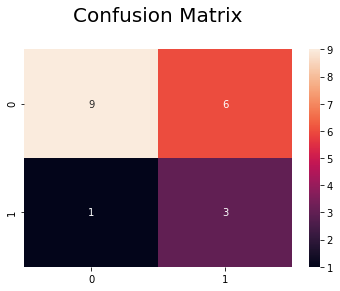

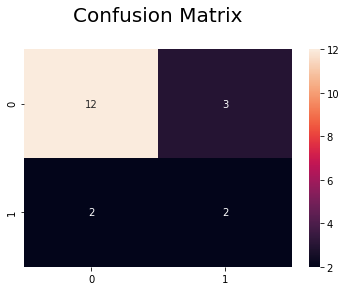

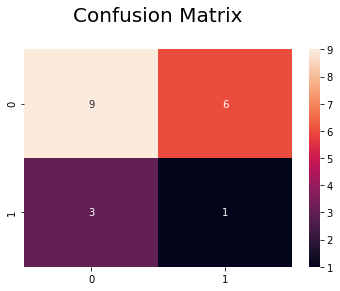

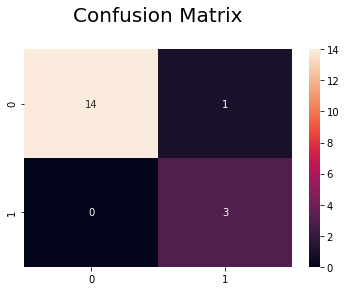

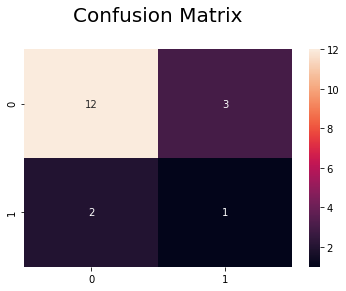

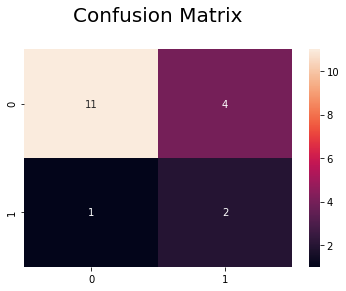

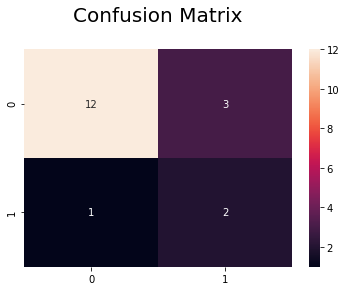

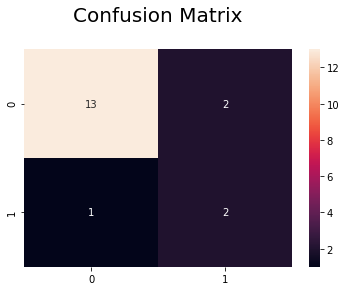

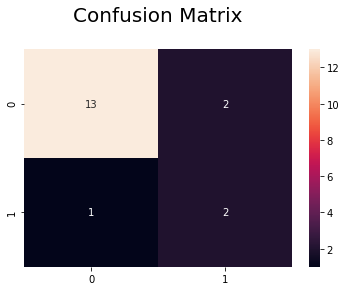

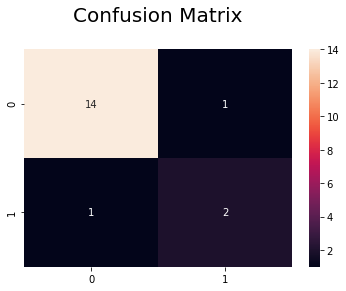

In [44]:
generate_cm(reg_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,0.25)
generate_cm(reg_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,0.25)
generate_cm(reg_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,0.25)
generate_cm(reg_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,0.25)
generate_cm(reg_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,0.25)
    
generate_cm(reg_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,0.25)
generate_cm(reg_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,0.25)
generate_cm(reg_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,0.25)
generate_cm(reg_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,0.25)
generate_cm(reg_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,0.25)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.46      0.86      0.60         7

    accuracy                           0.78        37
   macro avg       0.71      0.81      0.73        37
weighted avg       0.86      0.78      0.80        37



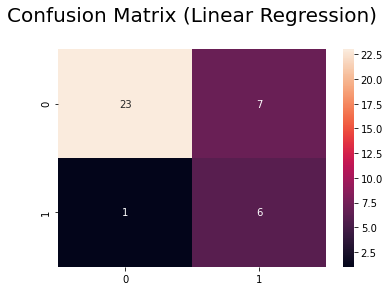

In [45]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_reg)
print(metrics.classification_report(Y_test,pred_reg))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (Linear Regression)\n', fontsize = 20)
plt.show()

# SVM model

In [46]:
svm_clf = SVC(kernel="linear",random_state=4)
svm_clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=4)

In [47]:
y_pred_svm = svm_clf.decision_function(X_test)

In [48]:
pred_svm = []
for i in range(0,len(Y_test)):
    if y_pred_svm[i]>=-0.874056:
        pred_svm.append(1)
    else:
        pred_svm.append(0)

In [83]:
def generate_cm_svm(clf,X_train,Y_train,X_test,Y_test,threshold):

    clf.fit(X_train, Y_train)
    pred = clf.decision_function(X_test)
    pred = predicted_class(Y_test,pred,threshold)

    confusionMatrix  = metrics.confusion_matrix(Y_test,pred)
    sns.heatmap(confusionMatrix,annot=True)
    plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
    plt.show()

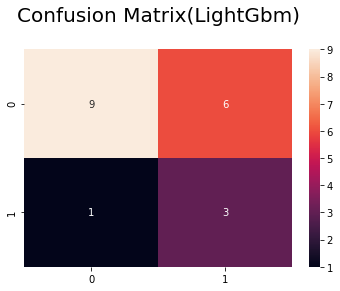

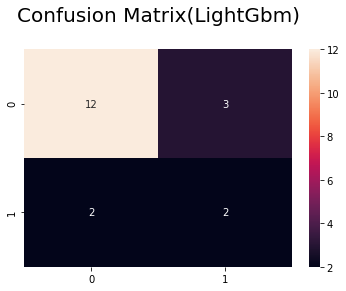

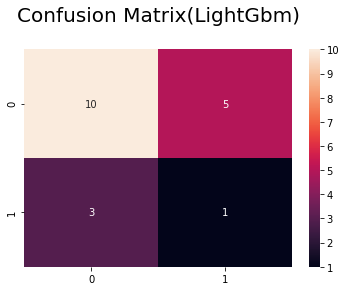

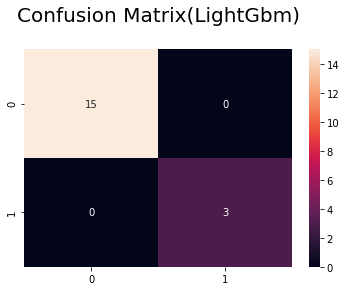

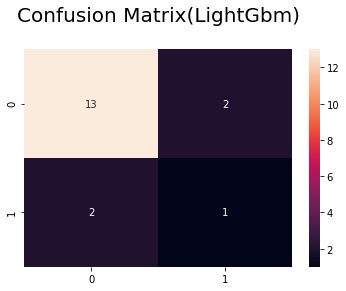

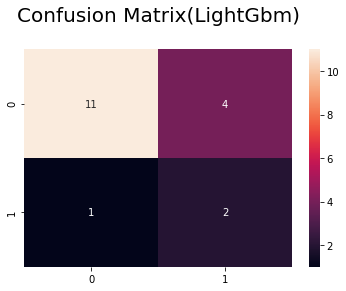

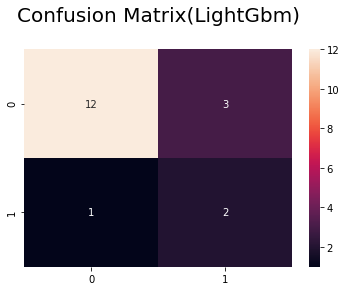

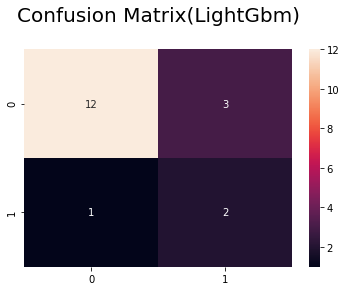

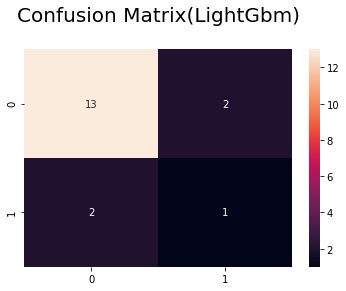

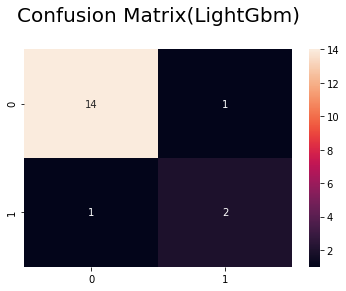

In [84]:
generate_cm_svm(svm_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,-0.865222)
    
generate_cm_svm(svm_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,-0.865222)

# SVM on Separate Test Data

In [51]:
y_pred_svm_test = svm_clf.decision_function(T)

In [52]:
pred_svm_test = predicted_class(Y_,y_pred_svm_test,-0.865222)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.20      0.17      0.18         6

    accuracy                           0.70        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.68      0.70      0.69        30



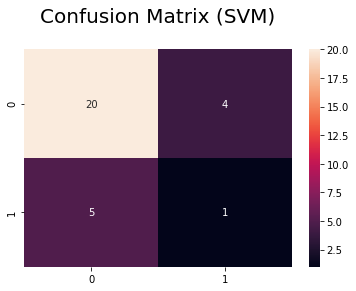

In [53]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_,pred_svm_test)
print(metrics.classification_report(Y_,pred_svm_test))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (SVM)\n', fontsize = 20)
plt.show()

# Lgbm Model

In [54]:
lgb_clf = lgb.LGBMRegressor(learning_rate = 0.05, boosting_type = 'DART',
                  objective='binary',
                  metric = ['auc','binary_logloss'],
                  num_leaves=10,
                  max_depth=50 )

# Testing the Lgbm Model

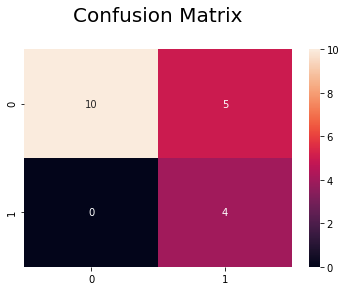

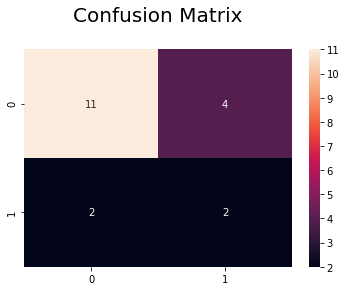

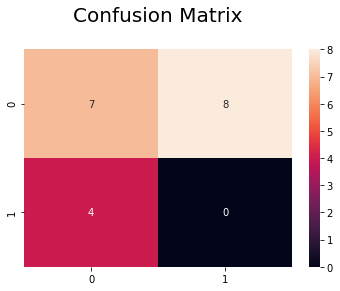

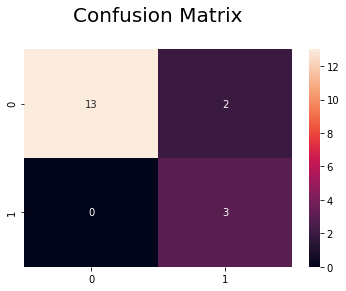

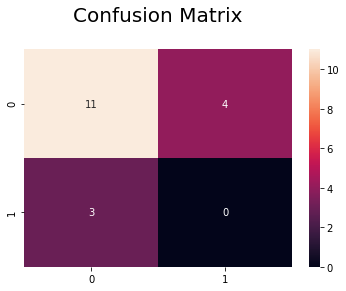

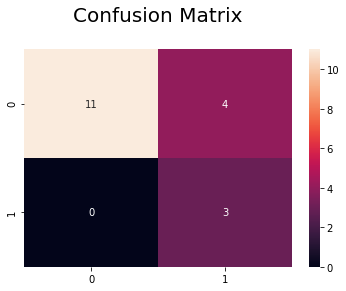

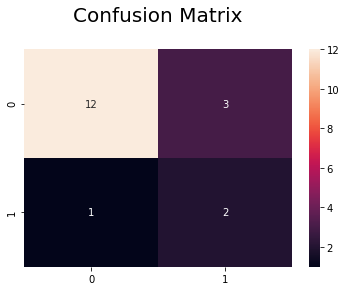

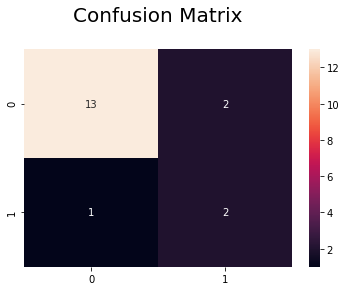

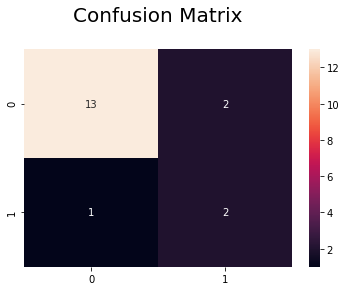

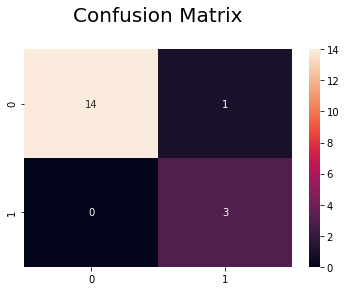

In [55]:
generate_cm(lgb_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,0.27)
generate_cm(lgb_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,0.27)
generate_cm(lgb_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,0.27)
generate_cm(lgb_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,0.27)
generate_cm(lgb_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,0.27)
    
generate_cm(lgb_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,0.27)
generate_cm(lgb_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,0.27)
generate_cm(lgb_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,0.27)
generate_cm(lgb_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,0.27)
generate_cm(lgb_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,0.27)

In [56]:
y_pred_lgbm = lgb_clf.predict(X_test)

In [57]:
pred_lgbm = []

for i in range(0,len(X_test)):
    if y_pred_lgbm[i]>=0.27:
        pred_lgbm.append(1)
    else:
        pred_lgbm.append(0)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.58      1.00      0.74         7

    accuracy                           0.86        37
   macro avg       0.79      0.92      0.82        37
weighted avg       0.92      0.86      0.88        37



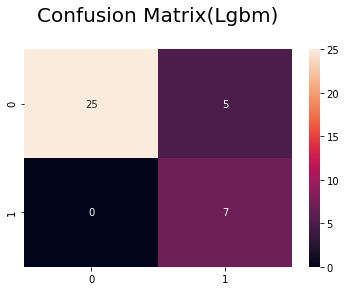

In [80]:
lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
print(metrics.classification_report(Y_test,pred_lgbm))

sns.heatmap(lgbm_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Lgbm)\n', fontsize = 20)
plt.show()

# Lgbm on separate test data

In [59]:
y_pred_lgbm_test = lgb_clf.predict(T)

In [60]:
pred_lgbm_test = predicted_class(Y_,y_pred_lgbm_test,0.27)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.40      0.67      0.50         6

    accuracy                           0.73        30
   macro avg       0.65      0.71      0.66        30
weighted avg       0.80      0.73      0.75        30



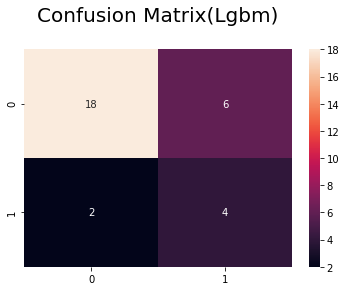

In [61]:
rand_forest_confusionMatrix  = metrics.confusion_matrix(Y_,pred_lgbm_test)
print(metrics.classification_report(Y_,pred_lgbm_test))

sns.heatmap(rand_forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Lgbm)\n', fontsize = 20)
plt.show()

# XGboost

In [62]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=42,booster='gblinear',learning_rate=0.01,eval_metric = 'auc',use_label_encoder=False)

clf_xgb.fit(X_train,
            Y_train,
            verbose=True,
            early_stopping_rounds = 10,
            eval_set = [(X_test,Y_test)]
)

score_arr =  cross_val_score(clf_xgb, X, Y,cv=10)

[0]	validation_0-auc:0.85238
[1]	validation_0-auc:0.85238
[2]	validation_0-auc:0.85238
[3]	validation_0-auc:0.85238
[4]	validation_0-auc:0.85238
[5]	validation_0-auc:0.85238
[6]	validation_0-auc:0.85238
[7]	validation_0-auc:0.85238
[8]	validation_0-auc:0.85238
[9]	validation_0-auc:0.85238


# Xgboost on separate test data

In [63]:
y_pred = clf_xgb.predict(T)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.40      0.33      0.36         6

    accuracy                           0.77        30
   macro avg       0.62      0.60      0.61        30
weighted avg       0.75      0.77      0.76        30



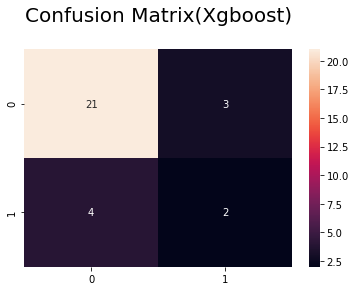

In [64]:
rand_forest_confusionMatrix  = metrics.confusion_matrix(Y_,y_pred)
print(metrics.classification_report(Y_,y_pred))

sns.heatmap(rand_forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Xgboost)\n', fontsize = 20)
plt.show()

====================================================Accuracy Score========================================================

# Accuracy score

In [65]:
print("Accuracy score of lgbm: ",metrics.accuracy_score(Y_test, pred_lgbm))
print("Accuracy score of svm: ",metrics.accuracy_score(Y_test, pred_svm))
print("Accuracy score of linear regression: ",metrics.accuracy_score(Y_test, pred_reg))

Accuracy score of lgbm:  0.8648648648648649
Accuracy score of svm:  0.8108108108108109
Accuracy score of linear regression:  0.7837837837837838


# AUC score

In [66]:
print("AUC scrore for lgbm: ",metrics.roc_auc_score(pred_lgbm,Y_test))
print("AUC scrore for SVM: ",metrics.roc_auc_score(pred_svm,Y_test))
print("AUC scrore for linear regression: ",metrics.roc_auc_score(pred_reg,Y_test))

AUC scrore for lgbm:  0.7916666666666667
AUC scrore for SVM:  0.73
AUC scrore for linear regression:  0.7099358974358975


=================================================Confusion Matrix=======================================================

# Confusion matrix (Linear Regression)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.46      0.86      0.60         7

    accuracy                           0.78        37
   macro avg       0.71      0.81      0.73        37
weighted avg       0.86      0.78      0.80        37



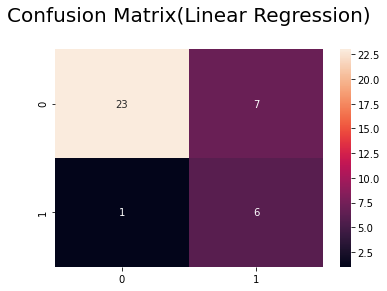

In [67]:
rand_forest_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_reg)
print(metrics.classification_report(Y_test,pred_reg))

sns.heatmap(rand_forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Linear Regression)\n', fontsize = 20)
plt.show()

# Confusion matrix (logistic regression)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.22      0.29      0.25         7

    accuracy                           0.68        37
   macro avg       0.52      0.53      0.52        37
weighted avg       0.71      0.68      0.69        37



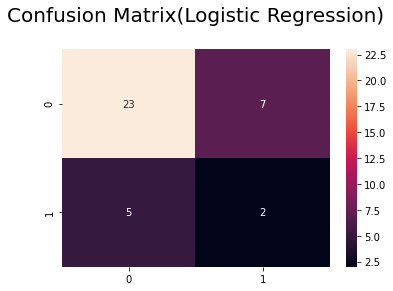

In [68]:
logistic_confusionMatrix  = metrics.confusion_matrix(Y_test,y_pred_logistic)
print(metrics.classification_report(Y_test,y_pred_logistic))

sns.heatmap(logistic_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

# Confusion matrix (Random Forest)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.43      0.60         7

    accuracy                           0.89        37
   macro avg       0.94      0.71      0.77        37
weighted avg       0.90      0.89      0.87        37



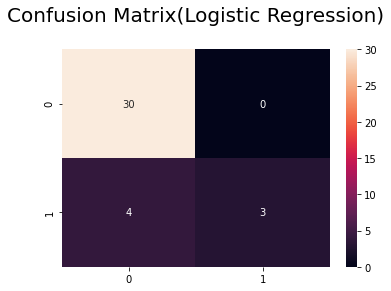

In [69]:
logistic_confusionMatrix  = metrics.confusion_matrix(Y_test,rand_forest_pred)
print(metrics.classification_report(Y_test,rand_forest_pred))

sns.heatmap(logistic_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

# Confusion matrix (KNN)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.29      0.44         7

    accuracy                           0.86        37
   macro avg       0.93      0.64      0.68        37
weighted avg       0.88      0.86      0.83        37



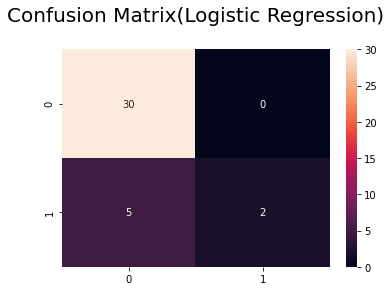

In [70]:
logistic_confusionMatrix  = metrics.confusion_matrix(Y_test,KNN_pred)
print(metrics.classification_report(Y_test,KNN_pred))

sns.heatmap(logistic_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

# Confusion matrix (Lgbm)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.58      1.00      0.74         7

    accuracy                           0.86        37
   macro avg       0.79      0.92      0.82        37
weighted avg       0.92      0.86      0.88        37



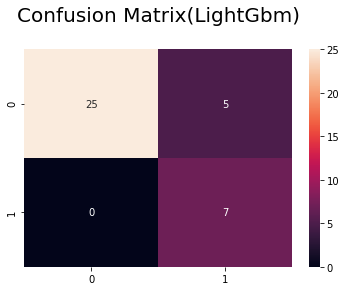

In [71]:
lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
print(metrics.classification_report(Y_test,pred_lgbm))
sns.heatmap(lgbm_confusionMatrix,annot=True)
plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
plt.show()

# Confusion matrix (SVM)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        30
           1       0.50      0.86      0.63         7

    accuracy                           0.81        37
   macro avg       0.73      0.83      0.75        37
weighted avg       0.87      0.81      0.83        37



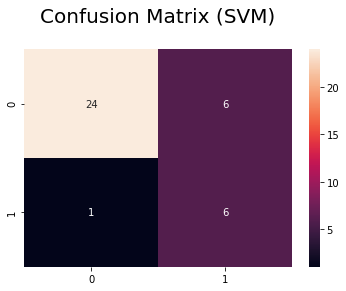

In [72]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_svm)
print(metrics.classification_report(Y_test,pred_svm))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (SVM)\n', fontsize = 20)
plt.show()

# ROC Curve

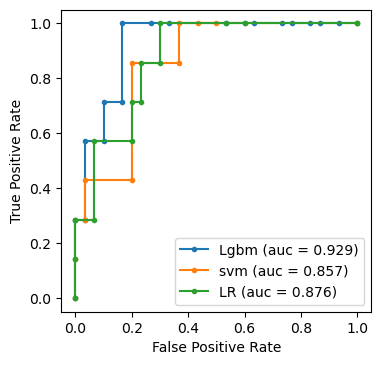

In [73]:
from sklearn.metrics import roc_curve, auc

lgbm_fpr,lgbm_tpr, lgbm_threshold = roc_curve(Y_test, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)


svm_fpr,svm_tpr, svm_threshold = roc_curve(Y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

reg_fpr,reg_tpr, reg_threshold = roc_curve(Y_test,y_pred_reg)
auc_reg = auc(reg_fpr, reg_tpr)

plt.figure(figsize=(4, 4), dpi=100)

plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='Lgbm (auc = %0.3f)' % auc_lgbm)

plt.plot(svm_fpr, svm_tpr, marker='.', label='svm (auc = %0.3f)' % auc_svm)

plt.plot(reg_fpr, reg_tpr, marker='.', label='LR (auc = %0.3f)' % auc_reg)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [74]:
i = np.arange(len(lgbm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(lgbm_tpr-(1-lgbm_fpr), index=i), 'thresholds' : pd.Series(lgbm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  6    0.379798
Name: thresholds, dtype: float64


In [75]:
i = np.arange(len(svm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(svm_tpr-(1-svm_fpr), index=i), 'thresholds' : pd.Series(svm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  6   -0.865222
Name: thresholds, dtype: float64


In [76]:

i = np.arange(len(reg_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(reg_tpr-(1-reg_fpr), index=i), 'thresholds' : pd.Series(reg_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  7    0.262111
Name: thresholds, dtype: float64


In [77]:
# def lgbm_pred(X_train,Y_train,X_test,Y_test):

#     d_train = lgb.Dataset(X_train,label=Y_train)


#     lgb_params = {'learning_rate':0.07, 'boosting_type':'DART',
#                   'objective':'binary',
#                   'metric':['auc','binary_logloss'],
#                   'num_leaves':10,
#                   'max_depth':50,
#                   'verbose':-100
#                  }

#     lgbm_clf = lgb.train(lgb_params,d_train,50)



#     y_pred_lgbm = lgbm_clf.predict(X_test)

#     pred_lgbm = predicted_class(X_test,y_pred_lgbm,0.30997)
    
#     lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
#     sns.heatmap(lgbm_confusionMatrix,annot=True)
#     plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
#     plt.show()
    

#     score = metrics.accuracy_score(Y_test, pred_lgbm)
    
#     return score

In [78]:
# def cross_validation_lgb():
    
#     score = []
    
#     score.append(lgbm_pred(fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l))
#     score.append(lgbm_pred(fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l))
#     score.append(lgbm_pred(fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l))
#     score.append(lgbm_pred(fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l))
#     score.append(lgbm_pred(fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l))
    
#     score.append(lgbm_pred(fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l))
#     score.append(lgbm_pred(fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l))
#     score.append(lgbm_pred(fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l))
#     score.append(lgbm_pred(fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l))
#     score.append(lgbm_pred(fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l))
    
#     return score   
    